# DataFrames


Başlamadan önce aşağıda linkini verdiğim dataset'i bilgisayarınıza indirmeniz gerekiyor.'
https://grouplens.org/datasets/movielens/


In [1]:
# Öncelikle pandas kütüphanesini eklememiz gerekiyor.
import pandas as pd

In [4]:
# pandas kütüphanesinden read_csv() fonksiyonunu kullanrak dosyayı okuyalım.
film = pd.read_csv('C:\\Users\\ceakn\\Desktop\\movielens\\movies.csv',sep=',')

In [6]:
# Dataframe olduğunu görelim
type(film)

pandas.core.frame.DataFrame

In [15]:
#DataFrame in ilk 10 değerini gösterir.Default olarak 5 ' e ayarlanmıştır. 
film.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [17]:
etiket = pd.read_csv('C:\\Users\\ceakn\\Desktop\\movielens\\tags.csv',sep=',')
etiket.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [19]:
rating = pd.read_csv('C:\\Users\\ceakn\\Desktop\\movielens\\ratings.csv',sep=',')
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [20]:
del etiket['timestamp']
del rating['timestamp']

# Data Structures

## Series

In [24]:
#etiket'ten 1. satır değerlerine bakalım.
row_0 = etiket.iloc[0]
print(type(row_0))
print("----------------------------------------------------------------")
print(row_0)

<class 'pandas.core.series.Series'>
----------------------------------------------------------------
userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [22]:
#İlk satırdaki indeklerimize bakalım.Yutkarıdakilerler aynımı
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [26]:
row_0 = row_0.rename("Birinci_satır")
row_0.name

'Birinci_satır'

In [27]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: Birinci_satır, dtype: object


In [28]:
row_0['userId']

18

## DataFrames

In [30]:
etiket.index

RangeIndex(start=0, stop=465564, step=1)

In [32]:
etiket.index

RangeIndex(start=0, stop=465564, step=1)

In [33]:
#İstediğimiz satırdaki değere iloc[] ile ulaşabiliyorduk.
etiket.iloc[[7,167888,465000]]

,userId,movieId,tag
7,65,1248,noir thriller
167888,50168,7828,less than 300 ratings
465000,138345,527,classic


# İstatistik değerler

In [34]:
rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [35]:
rating['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Describe fonksiyonu ne işe yarıyor? :/

NaN değerlerini hariç tutarak, bir veri kümesinin dağılımının  eğilimini, dağılımını ve şeklini özetleyen istatistiksel değerler oluşturur.
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

In [36]:
rating['rating'].mean()

3.5255285642993797

In [37]:
rating['rating'].sum()

70511498.5

In [44]:
rating['rating'].min()

0.5

In [39]:
rating['rating'].max()

5.0

In [40]:
rating['rating'].std()

1.051988919275684

In [41]:
rating['rating'].mode()

0    4.0
dtype: float64

In [43]:
rating.corr() # (ρ) değerini hesaplar

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


## Verileri Silme İşlemi

In [46]:
film.shape

(27278, 3)

In [48]:
#herhangi null (boş) sutun var mı?
# Eğer varsa bunları eleyelim. Eğer elemezsek analizlerin doğru sonuçlanmamısna sebep olabilir.
film.isnull().any()


movieId    False
title      False
genres     False
dtype: bool

In [49]:
etiket.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [55]:
etiket = etiket.dropna() #boş değerleri sildik

In [56]:
etiket.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [57]:
etiket.shape

(465548, 3)

# Veri Görselleştirme

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC09E34080>]], dtype=object)

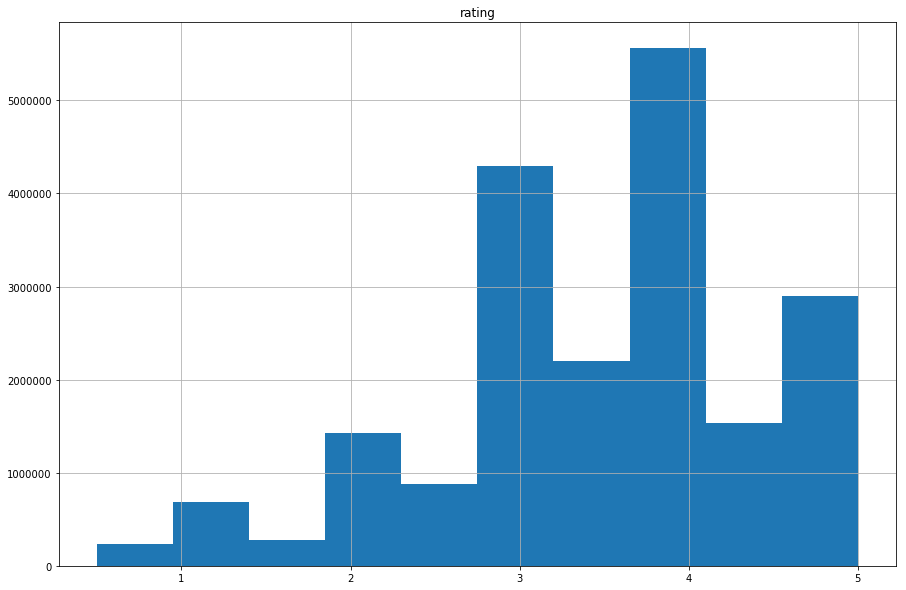

In [58]:
# Matplotlib kullanarak örnek olması açısından bu örneği gösteriyorum.Ayrıca Matplotlib notlarımıda paylaşacağım.
#Veri görselleştirmede sadece matplotlib değil ggplot,seabor,bokeh,plotly,geoplotlib,Gleam gibi birçok kütüphane mevcut
#Amacınıza uygun olanı seçip kullanmalısınız
%matplotlib inline
rating.hist(column='rating',figsize=(15,10))

# Sütunları Dilimleme 

In [60]:
film['title'].head() # title sütunundaki ilk 5 değeri verir

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [61]:
film[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [63]:
etiket_sayısı = etiket['tag'].value_counts()
etiket_sayısı[-10:]

setting:Israel                 1
SOS                            1
photographer as protagonist    1
Leisha Hailey                  1
com truise                     1
sloooooow                      1
crash scene                    1
seet                           1
reimagining                    1
Oscar:documentary              1
Name: tag, dtype: int64

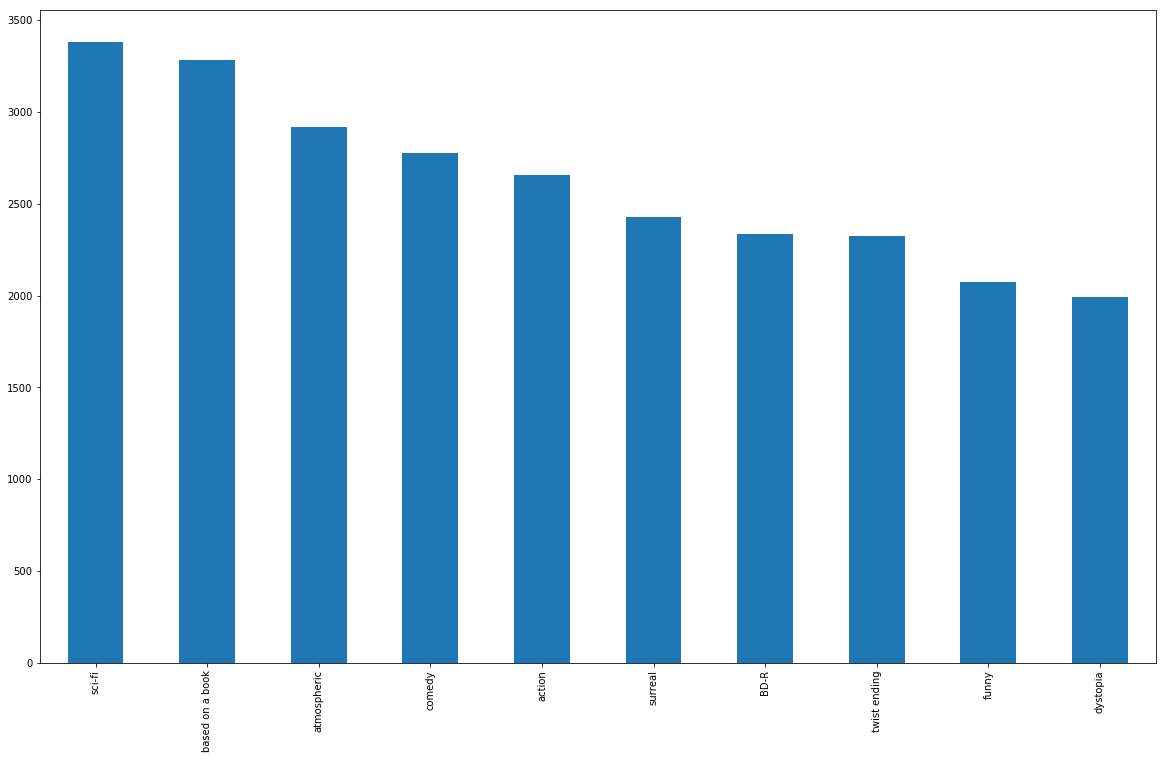

In [66]:
etiket_sayısı[:10].plot(kind='bar', figsize=(20,12)) # ilk 10 değeri grafiğe dönüştürdük


# Filtreleme

In [73]:
# Yuksek oranlı filmleri bulalım.Daha sonra yazdıralım.Bunun için yuksek_oranlı adında bir variable tanımladık ve buna
# rating DataFrame'inin rating kolonundaki değerlere bakıp, 3.5 ten büyük olanları atadık 
yuksek_oranlı = rating['rating'] >= 3.5
rating[yuksek_oranlı][0:10] #ilk 10 değeri yazdıralım

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


In [69]:
# şimdide Türü Comedy olan filmleri bulalım

is_comedy = film['genres'].str.contains('Comedy')
film[is_comedy][-10:] # son 10 satırı yazdırdık

,movieId,title,genres
27265,131231,Standby (2014),Comedy|Romance
27266,131237,What Men Talk About (2010),Comedy
27267,131239,Three Quarter Moon (2011),Comedy|Drama
27268,131241,Ants in the Pants (2000),Comedy|Romance
27269,131243,Werner - Gekotzt wird später (2003),Animation|Comedy
27270,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy
27271,131250,No More School (2000),Comedy
27272,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
